## Getting context-specificity

## What should the function do?

(1) Get the pictures belonging to the context.  
(2) Get the corresponding ground truths and saliency maps for a given model.  
(3) Evaluate metrics for that model in that context.

**TODO**  
adapt for several saliency maps  
save to file?  
add model  
add binary map

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from metrics import run_dataset_analysis
from utils import get_dataset_ids, get_context_saliencymaps

Get the IDs of the images that we have in our dataset.

In [4]:
# set dataset specific values
dataDir='C:\\Users\\thier\\Documents\\Studium\\MSNE\\18-19 WS\\NISE\\project\\NISE_saliency\\coco'
context = 'person'

gt_paths, sal_paths = get_context_saliencymaps(context, dataDir)
sal_paths = gt_paths[0]

nss_score, sim_score, ig_score, auc_score = run_dataset_analysis(gt_paths[0:10], sal_paths, skip_auc = True)

loading annotations into memory...
Done (t=8.03s)
creating index...
index created!
0.9186767893562269 1.0 0.24548896096369485 0.0
0.25319865955408194 0.378278911113739 -17.270229709631277 0.0
0.0629155021803832 0.33866527676582336 -21.228610238141822 0.0
0.2524653530050544 0.3982275724411011 -16.547765912018654 0.0
0.1986661071064152 0.22795285284519196 -20.987037808010907 0.0
1.2037800750647392 0.5218868851661682 -3.532373148362827 0.0
0.6392132949067537 0.5164051651954651 -12.259304513510113 0.0
0.28724340185941405 0.1434938758611679 -20.124072349503617 0.0
0.3552436057286944 0.32670944929122925 -15.837313304700817 0.0
0.36460755505426307 0.2858630120754242 -17.707213367375424 0.0


In [3]:
print(nss_score, sim_score, ig_score, auc_score)
print(sal_paths)

0.9186767893562269 1.0 0.24548896096369485 0.0
C:\Users\thier\Documents\Studium\MSNE\18-19 WS\NISE\project\NISE_saliency\coco\fixation_maps\COCO_val2014_000000000192.png


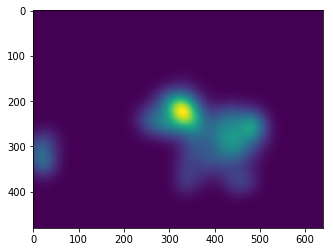

In [10]:
plt.imshow(io.imread(gt_paths[0]))

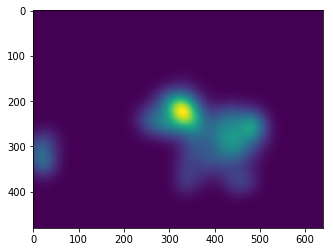

In [7]:
img = io.imread(gt_paths[0])
plt.imshow(img)

## COCO
For this, the directory has to contain a folder named "coco" and two subfolders, "images" and "annotations".

get the categories...

In [4]:
cats = coco.loadCats(coco.getCatIds())
#print(cats)

... and list them:

In [5]:
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



**more interesting for us**: List the supercategories ~ context!

In [6]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO supercategories: 
animal person outdoor vehicle accessory food furniture sports appliance indoor electronic kitchen


Get the images containing given categories

In [63]:
final_ids = np.intersect1d(unique_ids, ds_ids)

In [64]:
print("There are {} images containing the chosen category.".format(len(final_ids)))

There are 3141 images containing the chosen category.


In [65]:
img = coco.loadImgs(int(final_ids[1]))[0]
filepath = os.path.join(dataDir, "images", img['file_name'])
I = io.imread(filepath)
print(img['file_name'])

393226.0
COCO_val2014_000000000257.jpg


In [71]:
filename = img['file_name'].split('.')[0]
print(filename)

COCO_val2014_000000000257


In [89]:
final_ids.astype(int)
img = coco.loadImgs(final_ids)
print(len(img))

3141


In [79]:
gt_path = os.path.join(gt_dir, filename + ".png")
I = io.imread(gt_path)

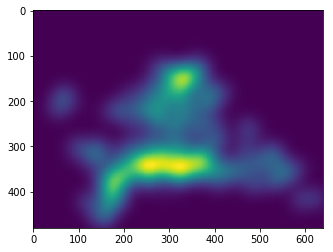

In [80]:
plt.imshow(I)

## Testing NSS

In [71]:
img = np.random.randint(10, size=(1000, 1500))

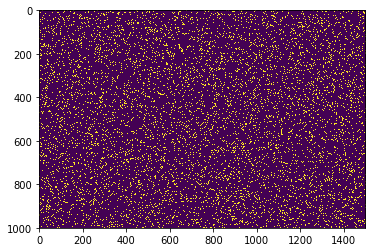

In [85]:
plt.imshow(img // np.max(9))

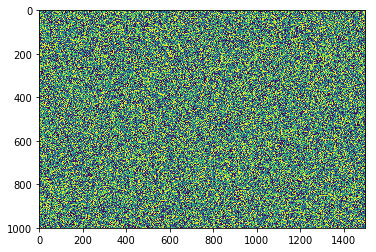

In [86]:
img_z = (img - np.mean(img)) / np.std(img)
plt.imshow(img_z)

In [87]:
np.mean(img)

4.503396666666666

In [91]:
np.sum(np.multiply(img // np.max(img), img_z)) / np.sum(img // np.max(img))

1.5655173042136954

In [89]:
from metrics import compute_nss

In [90]:
compute_nss(img_z, img // np.max(img))

1.5655173042136954